In [1]:
import os, sys
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# To import montepython you need to be in the right path. 

montepython_public_path = '/Users/pedro/Documents/GitHub/montepython_public'
sys.path.insert(0, montepython_public_path)
print('Set directory: ', montepython_public_path)

import montepython

Set directory:  /Users/pedro/Documents/GitHub/montepython_public


In [3]:
# Same here, but you need to be in the montepython folder to import the right things

montepython_path = '/Users/pedro/Documents/GitHub/montepython_public/montepython'
sys.path.insert(0, montepython_path)
print('Set directory: ', montepython_path)

import euclid_photometric_z_fofr
from initialise import initialise

Set directory:  /Users/pedro/Documents/GitHub/montepython_public/montepython
FORGE warning: CAMB is not correctly installed. So you can't predict P(k), only boost


In [4]:
# This is the main initialisation of the cosmo and data classes.
# I am sure there are better ways to do it, but this was the most straightforward way I found.

# You will have to change two paths:
# Path to output and params. This is the path you used to save the results of your first run with MP.
path_output = '/Users/pedro/Documents/GitHub/photometric_fofR/results_chain/fofr_6Params_HS6_WL_MCMC'
# If your output folder already has a param file, this is not necessary:
path_params = '/Users/pedro/Documents/GitHub/photometric_fofR/results_chain/fofr_6Params_HS6_WL_MCMC/log.param'
# Path for the covariance matrix (also in principle not required)
path_covmat = '/Users/pedro/Documents/GitHub/photometric_fofR/results/covmats/3x2pt_opt_6cosmo+freebias_HS6.covmat'

cosmo, data, command_line, success= \
    initialise('run -p '+ path_params +' -o ' + path_output + ' -c ' + path_covmat)

# Deleting empty chain file created automatically
os.remove(data.out_name)
os.remove(data.out_name[:-6]+'.paramnames')

/Users/pedro/Documents/GitHub/montepython_public/montepython/parser_mp.py:876: UserWarning: PyMultiNest detected but MultiNest likely not installed correctly. You can safely ignore this if not running with option -m NS
  warnings.warn('PyMultiNest detected but MultiNest likely not installed correctly. '
/Users/pedro/Documents/GitHub/montepython_public/montepython/parser_mp.py:1100: UserWarning: Appending to an existing folder: using the log.param instead of /Users/pedro/Documents/GitHub/photometric_fofR/results_chain/fofr_6Params_HS6_WL_MCMC/log.param
  warnings.warn(
/Users/pedro/Documents/GitHub/montepython_public/montepython/data.py:222: UserWarning: Your code location in the log.param file is in contradiction with your .conf file. I will use the one from log.param.
  warnings.warn(


Running Monte Python v3.6.0

with CLASS v3.1.0

Testing likelihoods for:
 ->euclid_photometric_z_fofr

Creating /Users/pedro/Documents/GitHub/photometric_fofR/results_chain/fofr_6Params_HS6_WL_MCMC/2023-09-22_10__1.txt



In [5]:
# Run CLASS for the params set in the file (can probably change this)
for elem in data.get_mcmc_parameters(['varying']):

    data.mcmc_parameters[elem]['current'] = data.mcmc_parameters[elem]['initial'][0]

data.update_cosmo_arguments()

cosmo.set(data.cosmo_arguments)
cosmo.compute()

In [6]:
# Define a new name for the likelihood
euclike = data.lkl['euclid_photometric_z_fofr']

# Set the debug_plot flag to True. This is crucial to have the requested output for the plots below. 
# Disabling it will mean calling the likelihood will only output the likelihood value
euclike.debug_plot=True

# Save here the ell values
ells=euclike.l_WL
ells_XC=euclike.l_XC

In [7]:
# First case: LCDM
euclike.use_fofR=False
# Evaluating the likelihood will just return the spectra we want
k_2d, zs, Pk_2d, Cl_LL, Cl_GG, Cl_LG, Cl_GL = euclike.loglkl(cosmo,data)

For debug, returning Cls


In [8]:
# Fitting formula
euclike.use_fofR='Winther'
k_2d, zs, Pk_2d_W, Cl_LL_W, Cl_GG_W, Cl_LG_W, Cl_GL_W = euclike.loglkl(cosmo,data)

f(R) active with Winther fitting function
For debug, returning Cls


In [9]:
# FORGE without correction
euclike.use_fofR='Forge'
k_2d, zs, Pk_2d_F, Cl_LL_F, Cl_GG_F, Cl_LG_F, Cl_GL_F = euclike.loglkl(cosmo,data)

f(R) active with Forge emulator
Training Emulator for z = 0.00
Now on x bin 0 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Now on x bin 1 of 4
Optimising the emulator with 20 restarts...
Now on x bin 2 of 4
Optimising the emulator with 20 restarts...
Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Now on x bin 0 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 1 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 2 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Training Emulator for z = 0.25
Now on x bin 0 of 4
Optimising the emulator with 20 restarts...
Now on x bin 1 of 4
Optimising the emulator with 20 restarts...
Now on x bin 2 of 4
Optimising the emulator with 20 restarts...
Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Now on x bin 0 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 1 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 2 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 1 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 2 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings

Training Emulator for z = 0.50
Now on x bin 0 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Now on x bin 1 of 4
Optimising the emulator with 20 restarts...
Now on x bin 2 of 4
Optimising the emulator with 20 restarts...
Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Now on x bin 0 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 1 of 4
Optimising the emulator with 20 restarts...
Now on x bin 2 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Training Emulator for z = 0.75
Now on x bin 0 of 4
Optimising the emulator with 20 restarts...
Now on x bin 1 of 4
Optimising the emulator with 20 restarts...
Now on x bin 2 of 4
Optimising the emulator with 20 restarts...
Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Now on x bin 0 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 1 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 2 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=ob

Training Emulator for z = 1.00
Now on x bin 0 of 4
Optimising the emulator with 20 restarts...
Now on x bin 1 of 4
Optimising the emulator with 20 restarts...
Now on x bin 2 of 4
Optimising the emulator with 20 restarts...
Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Now on x bin 0 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 1 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 2 of 4
Optimising the emulator with 20 restarts...
Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Training Emulator for z = 1.25
Now on x bin 0 of 4
Optimising the emulator with 20 restarts...
Now on x bin 1 of 4
Optimising the emulator with 20 restarts...
Now on x bin 2 of 4
Optimising the emulator with 20 restarts...
Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Now on x bin 0 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 1 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 2 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Training Emulator for z = 1.50
Now on x bin 0 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Now on x bin 1 of 4
Optimising the emulator with 20 restarts...
Now on x bin 2 of 4
Optimising the emulator with 20 restarts...
Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Now on x bin 0 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 1 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 2 of 4
Optimising the emulator with 20 restarts...
Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Training Emulator for z = 1.75
Now on x bin 0 of 4
Optimising the emulator with 20 restarts...
Now on x bin 1 of 4
Optimising the emulator with 20 restarts...
Now on x bin 2 of 4
Optimising the emulator with 20 restarts...
Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Now on x bin 0 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 1 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 2 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Training Emulator for z = 2.00
Now on x bin 0 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Now on x bin 1 of 4
Optimising the emulator with 20 restarts...
Now on x bin 2 of 4
Optimising the emulator with 20 restarts...
Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Now on x bin 0 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 1 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Now on x bin 2 of 4
Optimising the emulator with 20 restarts...
Now on x bin 3 of 4
Optimising the emulator with 20 restarts...


/Users/pedro/miniconda3/envs/montepythonjc6/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


For debug, returning Cls


In [10]:
# FORGE with correction
euclike.use_fofR='Forge_corr'
k_2d, zs, Pk_2d_Fc, Cl_LL_Fc, Cl_GG_Fc, Cl_LG_Fc, Cl_GL_Fc = euclike.loglkl(cosmo,data)

f(R) active with Forge emulator
For debug, returning Cls


Text(0, 0.5, '$P(k,z)$')

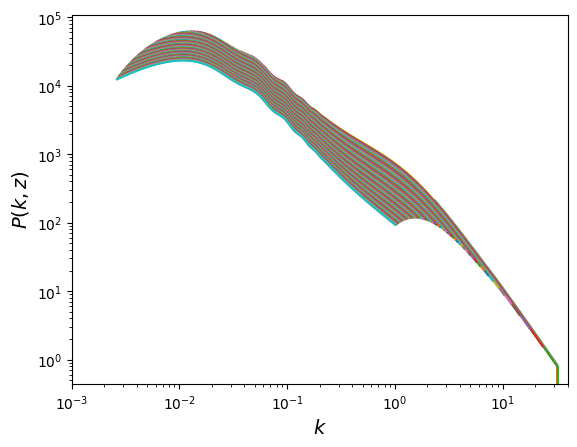

In [11]:
# Example plot of power spectra

for i in range(100):
    plt.loglog(k_2d[:,i],Pk_2d[:,i])
plt.xlim(0.001,40)
plt.xlabel(r'$k$',fontsize=14)
plt.ylabel(r'$P(k,z)$',fontsize=14)

Text(0, 0.5, '$C_\\ell$')

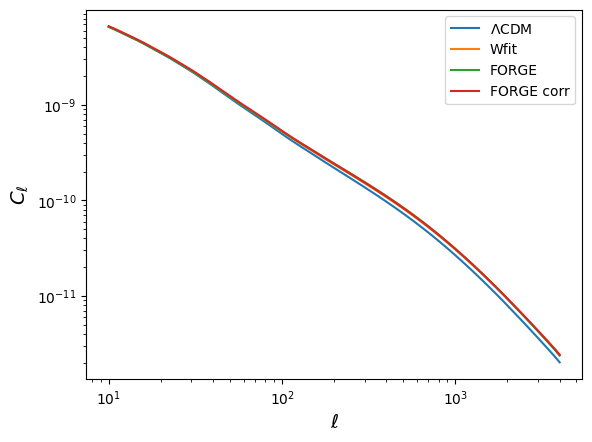

In [12]:
# Example plot of C_ell for WL

plt.loglog(ells,Cl_LL[:,0,0], label = '$\Lambda$CDM')
plt.loglog(ells,Cl_LL_W[:,0,0], label = 'Wfit')
plt.loglog(ells,Cl_LL_F[:,0,0], label = 'FORGE')
plt.loglog(ells,Cl_LL_Fc[:,0,0], label = 'FORGE corr')

plt.legend()

plt.xlabel(r'$\ell$',fontsize=14)
plt.ylabel(r'$C_\ell$',fontsize=14)

Text(0, 0.5, '$C_\\ell/C_\\ell^{Halofit}$')

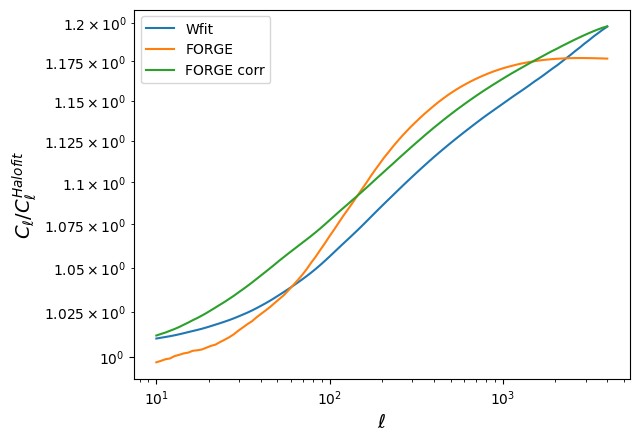

In [13]:
# Example plot of C_ell ratios for WL

plt.loglog(ells,(Cl_LL_W[:,0,0])/(Cl_LL[:,0,0]), label = 'Wfit')
plt.loglog(ells,(Cl_LL_F[:,0,0])/(Cl_LL[:,0,0]), label = 'FORGE')
plt.loglog(ells,(Cl_LL_Fc[:,0,0])/(Cl_LL[:,0,0]), label = 'FORGE corr')

plt.legend()
plt.xlabel(r'$\ell$',fontsize=14)
plt.ylabel(r'$C_\ell/C_\ell^{Halofit}$',fontsize=14)

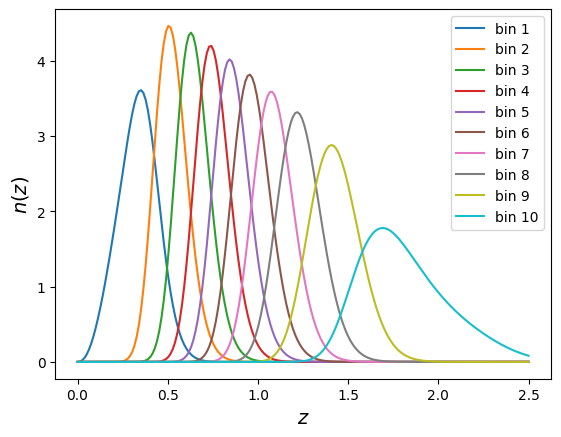

In [14]:
# Plot n(z) and get mean z for each bin
mean_z=[]
for bin in range(10):
    plt.plot(zs,euclike.eta_z[:,bin],label='bin %d'%(bin+1))
    mean_z.append( np.sum(zs*euclike.eta_z[:,bin])/np.sum(euclike.eta_z[:,bin]))
    #print(mean_z)
    #plt.axvline(mean_z)

plt.legend()
plt.xlabel(r'$z$',fontsize=14)
plt.ylabel(r'$n(z)$',fontsize=14)
mean_z=np.asarray(mean_z)

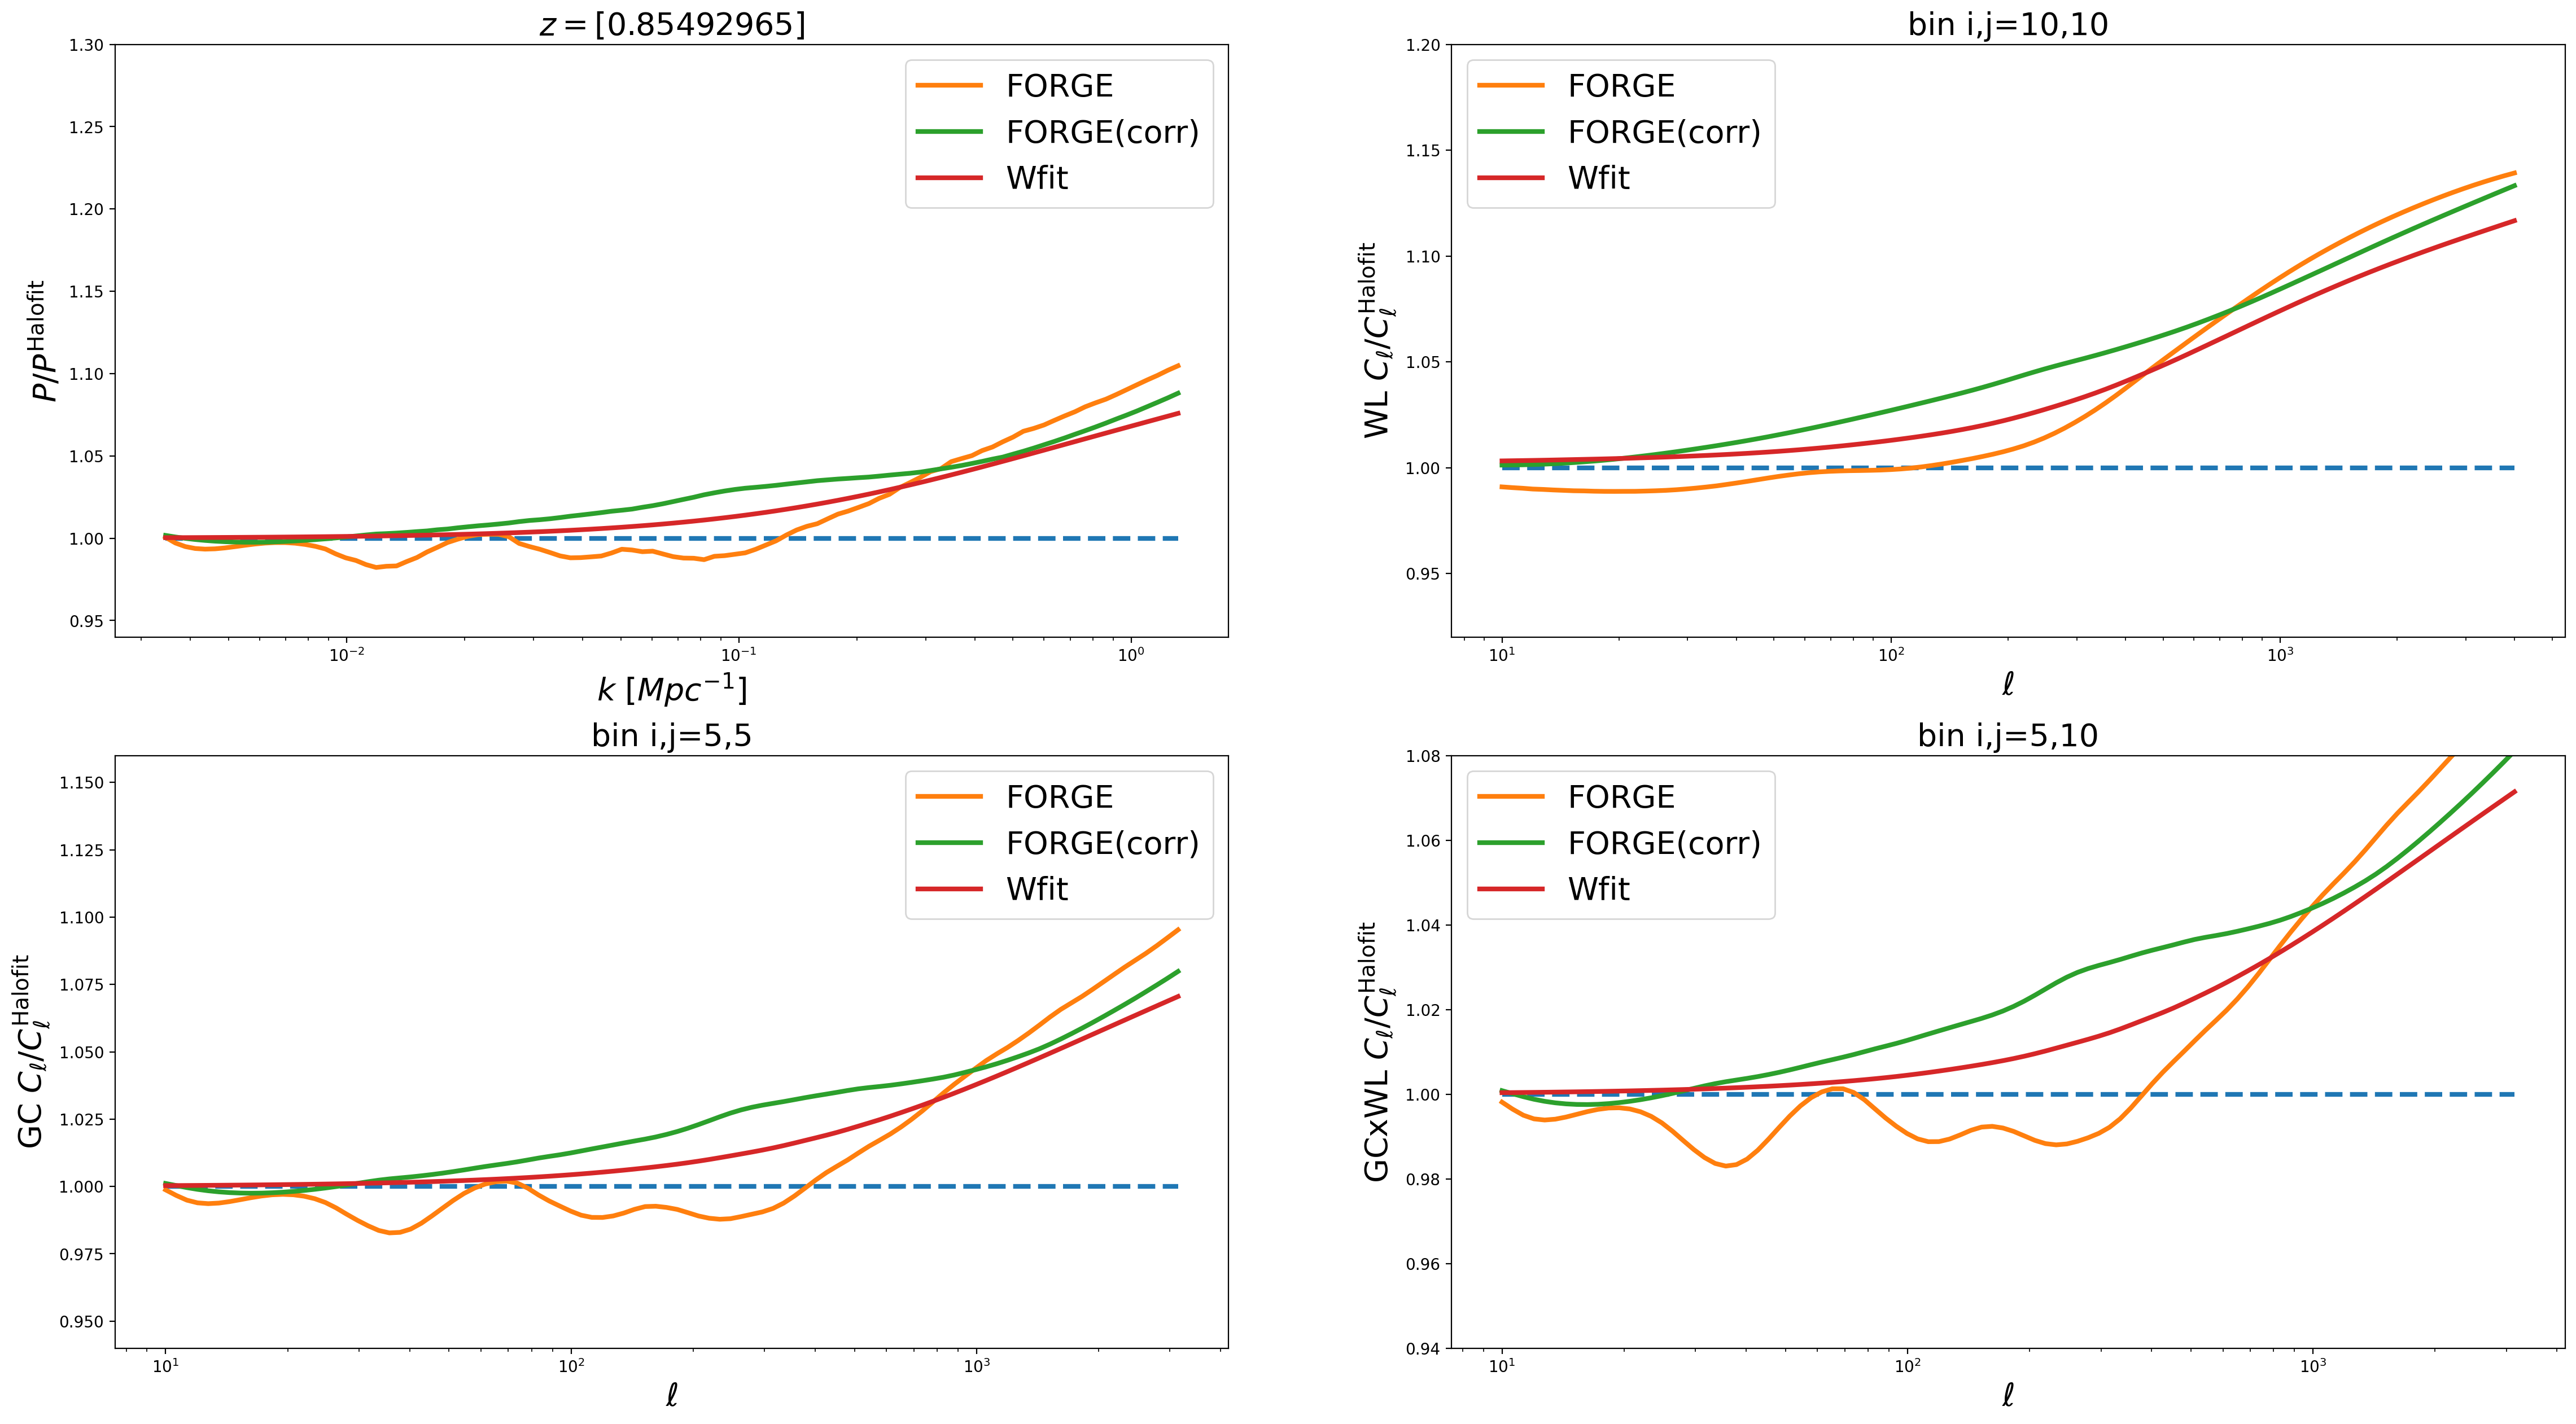

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(28,15), dpi=200)

# Select bins
i_WL = 10
i_GC = 5


axs[0,1].semilogx(ells, ells**0, ls='--', lw=3)

pl_label_2 = 'FORGE'
axs[0,1].semilogx(ells, (Cl_LL_F[:,i_WL-1,i_WL-1])/(Cl_LL[:,i_WL-1,i_WL-1]), ls='-', label=pl_label_2, lw=3)

pl_label_2 = 'FORGE(corr)'
axs[0,1].semilogx(ells, (Cl_LL_Fc[:,i_WL-1,i_WL-1])/(Cl_LL[:,i_WL-1,i_WL-1]), ls='-', label=pl_label_2, lw=3)

pl_label_4 = 'Wfit'
axs[0,1].semilogx(ells, (Cl_LL_W[:,i_WL-1,i_WL-1])/(Cl_LL[:,i_WL-1,i_WL-1]), ls='-', label=pl_label_4, lw=3)

axs[0,1].set_xlabel(r'$\ell$', fontsize=20)
axs[0,1].set_ylabel(r'WL $C_\ell/C_\ell^{\rm Halofit}$', fontsize=20)
axs[0,1].set_title('bin i,j={:d},{:d}'.format(i_WL,i_WL), fontsize=20)


axs[0,1].set_ylim([0.92,1.20])

axs[0,1].legend(fontsize=20);


axs[1,0].semilogx(ells_XC, ells_XC**0, ls='--', lw=3)

pl_label_2 = 'FORGE'
axs[1,0].semilogx(ells_XC, (Cl_GG_F[:,i_GC-1,i_GC-1])/(Cl_GG[:,i_GC-1,i_GC-1]), ls='-', label=pl_label_2, lw=3)

pl_label_2 = 'FORGE(corr)'
axs[1,0].semilogx(ells_XC, (Cl_GG_Fc[:,i_GC-1,i_GC-1])/(Cl_GG[:,i_GC-1,i_GC-1]), ls='-', label=pl_label_2, lw=3)

pl_label_4 = 'Wfit'
axs[1,0].semilogx(ells_XC, (Cl_GG_W[:,i_GC-1,i_GC-1])/(Cl_GG[:,i_GC-1,i_GC-1]), ls='-', label=pl_label_4, lw=3)


axs[1,0].set_xlabel(r'$\ell$', fontsize=20)
axs[1,0].set_ylabel(r'GC $C_\ell/C_\ell^{\rm Halofit}$', fontsize=20)
axs[1,0].set_title('bin i,j={:d},{:d}'.format(i_GC,i_GC), fontsize=20)


axs[1,0].set_ylim([0.94,1.16])

axs[1,0].legend(fontsize=20);


axs[1,1].semilogx(ells_XC, ells_XC**0, ls='--', lw=3)

pl_label_2 = 'FORGE'
axs[1,1].semilogx(ells_XC, (Cl_LG_F[:,i_WL-1,i_GC-1])/(Cl_LG[:,i_WL-1,i_GC-1]), ls='-', label=pl_label_2, lw=3)

pl_label_2 = 'FORGE(corr)'
axs[1,1].semilogx(ells_XC, (Cl_LG_Fc[:,i_WL-1,i_GC-1])/(Cl_LG[:,i_WL-1,i_GC-1]), ls='-', label=pl_label_2, lw=3)

pl_label_4 = 'Wfit'
axs[1,1].semilogx(ells_XC, (Cl_LG_W[:,i_WL-1,i_GC-1])/(Cl_LG[:,i_WL-1,i_GC-1]), ls='-', label=pl_label_4, lw=3)

axs[1,1].set_xlabel(r'$\ell$', fontsize=20)
axs[1,1].set_ylabel(r'GCxWL $C_\ell/C_\ell^{\rm Halofit}$', fontsize=20)
axs[1,1].set_title('bin i,j={:d},{:d}'.format(i_GC,i_WL), fontsize=20)


axs[1,1].set_ylim([0.94,1.08])

axs[1,1].legend(fontsize=20);


#P(k) plotted on the mean redshift of the GC bin
z_chosen = mean_z[i_GC-1]

mask_z_chosen = abs(zs-z_chosen)<0.005

axs[0,0].semilogx(k_2d[:,mask_z_chosen], k_2d[:,mask_z_chosen]**0, ls='--', lw=3)

pl_label_2 = 'FORGE'
axs[0,0].semilogx(k_2d[:,mask_z_chosen], Pk_2d_F[:,mask_z_chosen]/Pk_2d[:,mask_z_chosen], ls='-', label=pl_label_2, lw=3)

pl_label_2 = 'FORGE(corr)'
axs[0,0].semilogx(k_2d[:,mask_z_chosen], Pk_2d_Fc[:,mask_z_chosen]/Pk_2d[:,mask_z_chosen], ls='-', label=pl_label_2, lw=3)

pl_label_4 = 'Wfit'
axs[0,0].semilogx(k_2d[:,mask_z_chosen], Pk_2d_W[:,mask_z_chosen]/Pk_2d[:,mask_z_chosen], ls='-', label=pl_label_4, lw=3)

#axs[0,0].fill_between(ks, 1+0.01*ks**0,1-0.01*ks**0,alpha = 0.15, color = 'b')
#axs[0,0].fill_between(ks, 1+0.02*ks**0,1-0.02*ks**0,alpha = 0.15, color = 'b')
axs[0,0].set_ylim([0.94,1.3])
axs[0,0].set_title(r'$z=%s$'%zs[mask_z_chosen], fontsize=20)
axs[0,0].set_xlabel(r'$k$ $[{Mpc}^{-1}]$', fontsize=20)
axs[0,0].set_ylabel(r'$P/P^{\rm Halofit}$', fontsize=20)

axs[0,0].legend(fontsize=20);